In [3]:
# ===============================
# 1. IMPORT LIBRARIES
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

# ===============================
# 2. LOAD DATASETS
# ===============================

city_day = pd.read_csv("city_day.csv")
city_hour = pd.read_csv("city_hour.csv")
station_day = pd.read_csv("station_day.csv")
station_hour = pd.read_csv("station_hour.csv")
station = pd.read_csv("stations.csv")

city_day['Date'] = pd.to_datetime(city_day['Date'])
city_hour['Datetime'] = pd.to_datetime(city_hour['Datetime'])
station_day['Date'] = pd.to_datetime(station_day['Date'])
station_hour['Datetime'] = pd.to_datetime(station_hour['Datetime'])

print("Loaded all datasets successfully!")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12076\2672146608.py:19: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  station_hour = pd.read_csv("station_hour.csv")


Loaded all datasets successfully!


## Analyzing the shapes of the given datasets 

In [2]:
print(city_day.isnull().shape)
print(city_hour.isnull().shape)
print(station_day.isnull().shape)
print(station_hour.isnull().shape)

(29531, 16)
(707875, 16)
(108035, 16)
(2589083, 16)


### The given dataset contains a lot of Nan Values

In [3]:
print(city_day.isnull().sum())
print(city_hour.isnull().sum())
print(station_day.isnull().sum())
print(station_hour.isnull().sum())

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64
City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
Benzene       163646
Toluene       220607
Xylene        455829
AQI           129080
AQI_Bucket    129080
dtype: int64
StationId         0
Date              0
PM2.5         21625
PM10          42706
NO            17106
NO2           16547
NOx           15500
NH3           48105
CO            12998
SO2           25204
O3            25568
Benzene       31455
Toluene       38702
Xylene        85137
AQI           21010
AQI_Bucket    2101

In [4]:
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
city_hour.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [6]:
station_day.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [7]:
station_hour.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [8]:
station.head()

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


## Specific Function written code to handle Nan Values

In [4]:
def clean_base(df):
    df = df.copy()
    df = df.replace(['-', 'NA', 'nan', 'NaN', '', ' '], np.nan)
    return df
# Function to process missing values column-wise
def handle_missing(df):
    df = df.copy()
    for col in df.columns:
        missing_pct = df[col].isna().mean() * 100
        # Case 1: Missing <= 5% → Drop rows
        if missing_pct <= 5:
            df = df[df[col].notna()]
        # Case 2: Missing > 5% → Impute
        else:
            # Numeric imputation → median
            if pd.api.types.is_numeric_dtype(df[col]):
                med = df[col].median()
                df[col] = df[col].fillna(med)
            
            # Categorical imputation → mode
            else:
                try:
                    mode = df[col].mode().iloc[0]
                    df[col] = df[col].fillna(mode)
                except:
                    df[col] = df[col].fillna("Unknown")
    
    return df
# Apply to all datasets
for df_name in ["city_day", "city_hour", "station_day", "station_hour"]:
    print(f"\nCleaning : {df_name}")
    df = globals()[df_name]
    
    # Step 1: Base cleaning
    df = clean_base(df)
    
    # Step 2: Convert numeric columns safely
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='ignore')
    
    # Step 3: Missing data strategy
    df = handle_missing(df)
    
    # Save back to global variable
    globals()[df_name] = df
    
    print(f"Completed : {df_name} | Shape: {df.shape}")
print("\n Full cleaning completed.")


Cleaning : city_day
Completed : city_day | Shape: (29531, 16)

Cleaning : city_hour


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12076\2061274130.py:39: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


Completed : city_hour | Shape: (707875, 16)

Cleaning : station_day
Completed : station_day | Shape: (108035, 16)

Cleaning : station_hour
Completed : station_hour | Shape: (2589083, 16)

 Full cleaning completed.


### All the null values have been handled properly

In [10]:
print(city_day.isnull().sum())
print(city_hour.isnull().sum())
print(station_day.isnull().sum())
print(station_hour.isnull().sum())

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64
City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64
StationId     0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64
StationId     0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
T

# Now moving Forward to Performing EDA according to the tasks assigned

## 1. Pollution Hotspot Identification
### Map city and station-level high pollution zones across the 5-year period. Identify seasonal spikes, festival effects (e.g.,Diwali),  crop-burning ,meteorological influences where possible.Determine which pollutants drive AQI changes across cities.

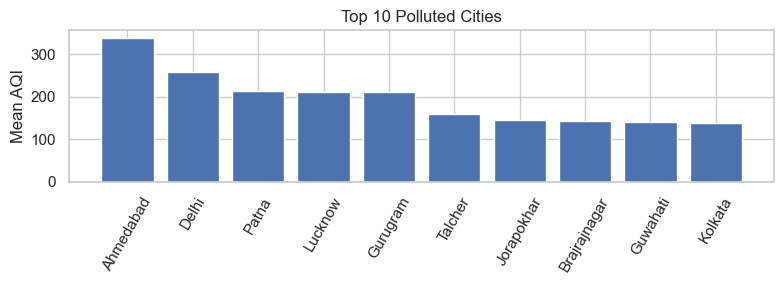

In [5]:
# City-Level Pollution Analysis
city_stats = (
    city_day.groupby("City").agg(
        mean_aqi = ("AQI", "mean"),
        median_aqi = ("AQI", "median"),
        percentage_days_aq1_more_than_100 = ("AQI", lambda s: 100 * (s > 100).sum() / s.count())
    )
    .reset_index()
)
top = city_stats.sort_values("mean_aqi", ascending=False).head(10)
plt.figure(figsize=(8,3))
plt.bar(top["City"], top["mean_aqi"])
plt.xticks(rotation=60)
plt.ylabel("Mean AQI")
plt.title("Top 10 Polluted Cities")
plt.tight_layout()

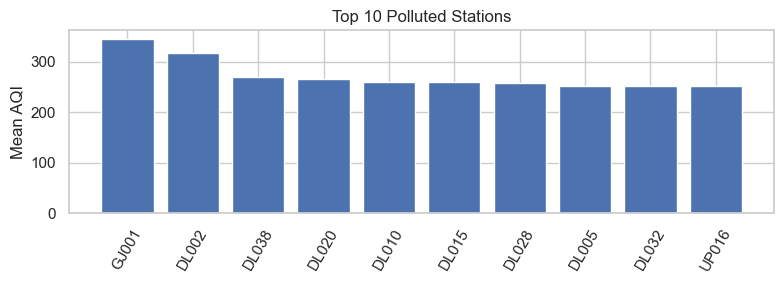

In [6]:
# Station Level Pollution Analysis
st_stats = (
    station_day.groupby("StationId").agg(
        station_city = ("StationId", lambda sid: station.loc[
            station["StationId"] == sid.iloc[0], "City"
        ].iloc[0] if (station["StationId"] == sid.iloc[0]).any() else np.nan),
        
        mean_aqi = ("AQI", "mean"),
        days_reported = ("Date", "nunique"),
        per_days_aqi_gt_100 = ("AQI", lambda s: 100 * (s > 100).sum() / s.count())
    )
    .reset_index()
)
top = st_stats.sort_values("mean_aqi", ascending=False).head(10)
plt.figure(figsize=(8,3))
plt.bar(top["StationId"], top["mean_aqi"])
plt.xticks(rotation=60)
plt.ylabel("Mean AQI")
plt.title("Top 10 Polluted Stations")
plt.tight_layout()

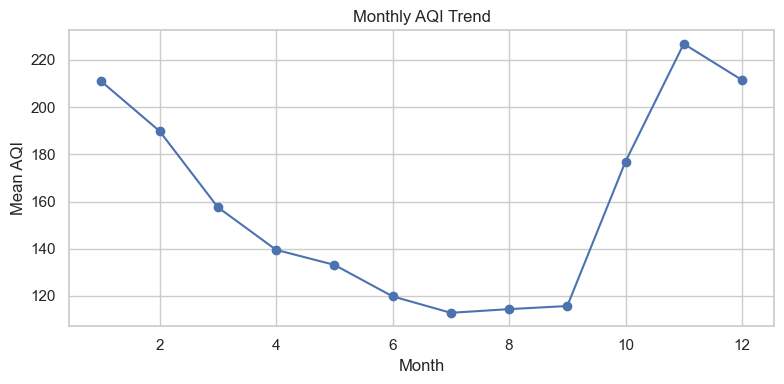

In [7]:
# Monthly AQI Analysis
city_day["Date"] = pd.to_datetime(city_day["Date"], errors="coerce")
city_day["month"] = city_day["Date"].dt.month
monthly = city_day.groupby("month")["AQI"].mean().reset_index()
plt.figure(figsize=(8,4))
plt.plot(monthly["month"], monthly["AQI"], marker="o")
plt.title("Monthly AQI Trend")
plt.xlabel("Month")
plt.ylabel("Mean AQI")
plt.tight_layout()
plt.show()

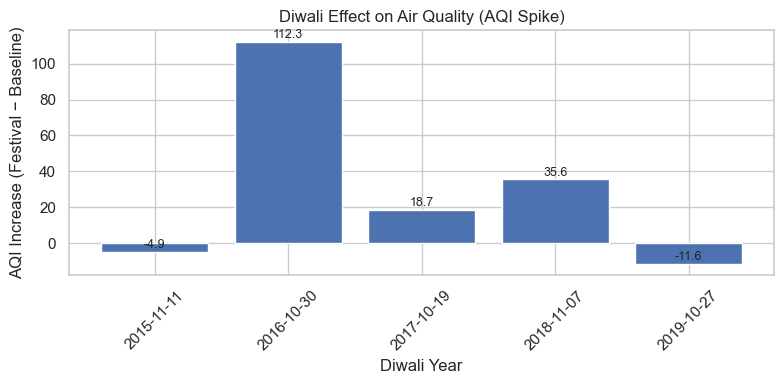

In [8]:
# Analyzing Diwali Effect
diwali_dates = pd.to_datetime([
    "2015-11-11","2016-10-30","2017-10-19",
    "2018-11-07","2019-10-27","2020-11-14"
])
def diwali_effect(df_city, window=2):
    rows = []
    for d in diwali_dates:
        window_mask = (df_city["Date"] >= d - pd.Timedelta(days=window)) & (df_city["Date"] <= d + pd.Timedelta(days=window))
        fest_mean = df_city.loc[window_mask, "AQI"].mean()

        month_mask = df_city["Date"].dt.month == d.month
        baseline = df_city.loc[month_mask & (~window_mask), "AQI"].mean()

        rows.append({"diwali": d.date(), "festival_mean": fest_mean, "baseline_mean": baseline, "delta": fest_mean - baseline})
    return pd.DataFrame(rows) 
df = diwali_effect(city_day)
plt.figure(figsize=(8,4))
plt.bar(df["diwali"].astype(str), df["delta"])
plt.ylabel("AQI Increase (Festival − Baseline)")
plt.xlabel("Diwali Year")
plt.title("Diwali Effect on Air Quality (AQI Spike)")
plt.xticks(rotation=45)
# Add value labels
for i, v in enumerate(df["delta"]):
    plt.text(i, v + 2, f"{v:.1f}", ha="center", fontsize=9)
plt.tight_layout()
plt.show()

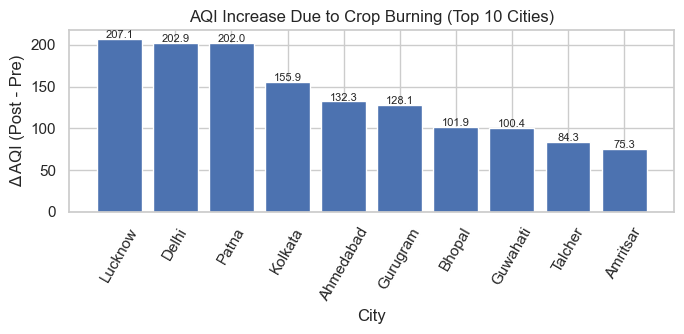

In [9]:
# Analyzing Crop Burning Effects
city_day["month"] = city_day["Date"].dt.month

crop_stats = []
for city in city_day["City"].unique():
    dfc = city_day[city_day["City"] == city]

    post = dfc[dfc["month"].isin([10,11,12])]["AQI"].mean()  # post-harvest
    pre = dfc[dfc["month"].isin([6,7,8,9])]["AQI"].mean()    # baseline

    crop_stats.append({"city": city, "post_mean": post, "pre_mean": pre, "delta": post - pre})
crop_stats = pd.DataFrame(crop_stats).sort_values("delta", ascending=False)  
# Crop burning stats already computed as `crop_stats`
top_crop = crop_stats.head(10)   # show top 10 cities with largest spike
plt.figure(figsize=(7,3.5))
plt.bar(top_crop["city"], top_crop["delta"])
plt.title("AQI Increase Due to Crop Burning (Top 10 Cities)")
plt.xlabel("City")
plt.ylabel("Δ AQI (Post - Pre)")
plt.xticks(rotation=60)
# Value labels
for i, v in enumerate(top_crop["delta"]):
    plt.text(i, v + 1, f"{v:.1f}", ha="center", fontsize=8)
plt.tight_layout()
plt.show()

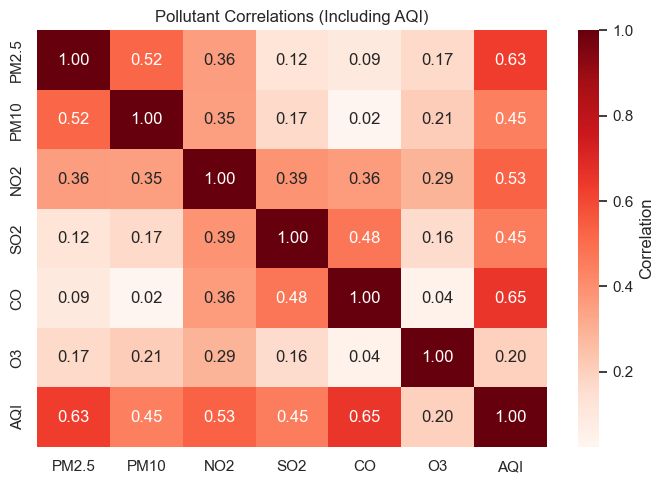

In [10]:
polls = ["PM2.5","PM10","NO2","SO2","CO","O3","AQI"]
corr = city_day[polls].corr()["AQI"].sort_values(ascending=False)
# Correlation computed above  corr
polls = ["PM2.5","PM10","NO2","SO2","CO","O3","AQI"]

# Compute correlation matrix
corr_matrix = city_day[polls].corr()

# Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Reds", cbar_kws={'label':'Correlation'})
plt.title("Pollutant Correlations (Including AQI)")
plt.tight_layout()
plt.show()

## 2. Pollutant Correlation & Source Attribution

### Analyze relationships between pollutants.Identify clusters of cities with similar pollution profiles. Evaluate which stations or regions show industrial, vehicular, or seasonal pollution markers

c:\Users\LENOVO\.conda\envs\EkamML\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


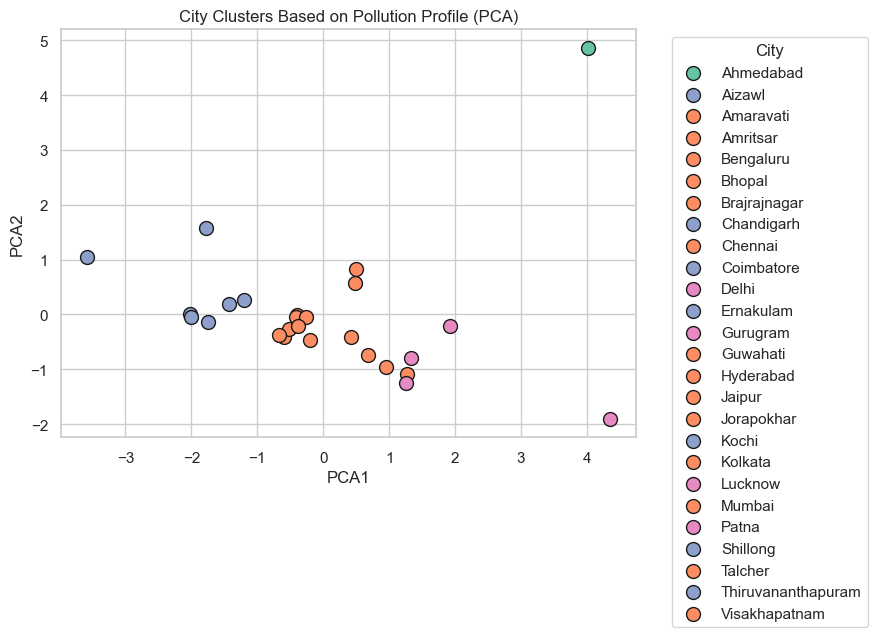

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pollutants = ["PM2.5","PM10","NO2","SO2","CO","O3"]

# Aggregate city-level mean pollutant values
city_pollution = city_day.groupby("City")[pollutants].mean().fillna(0)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(city_pollution)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
city_pollution['cluster'] = kmeans.fit_predict(X_scaled)

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
city_pollution['PCA1'] = X_pca[:,0]
city_pollution['PCA2'] = X_pca[:,1]

# Palette for clusters
palette = sns.color_palette("Set2", n_colors=city_pollution['cluster'].nunique())

plt.figure(figsize=(9,6))

# Plot each city with cluster color and label in legend
for i, city in enumerate(city_pollution.index):
    cluster = city_pollution.loc[city, 'cluster']
    plt.scatter(city_pollution.loc[city, 'PCA1'], city_pollution.loc[city, 'PCA2'],
                color=palette[cluster], s=100, edgecolor='k', label=city)

plt.title("City Clusters Based on Pollution Profile (PCA)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

# Remove duplicate labels in legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="City", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

                                  station_name           city  \
0               Secretariat, Amaravati - APPCB      Amaravati   
1       GVM Corporation, Visakhapatnam - APPCB  Visakhapatnam   
2              Railway Colony, Guwahati - APCB       Guwahati   
3            DRM Office Danapur, Patna - BSPCB          Patna   
4   Govt. High School Shikarpur, Patna - BSPCB          Patna   
5      IGSC Planetarium Complex, Patna - BSPCB          Patna   
6                      Muradpur, Patna - BSPCB          Patna   
7                Rajbansi Nagar, Patna - BSPCB          Patna   
8                     Samanpura, Patna - BSPCB          Patna   
9                 Sector-25, Chandigarh - CPCC     Chandigarh   
10                        Alipur, Delhi - DPCC          Delhi   
11                   Anand Vihar, Delhi - DPCC          Delhi   
12                   Ashok Vihar, Delhi - DPCC          Delhi   
13                      Aya Nagar, Delhi - IMD          Delhi   
14                       

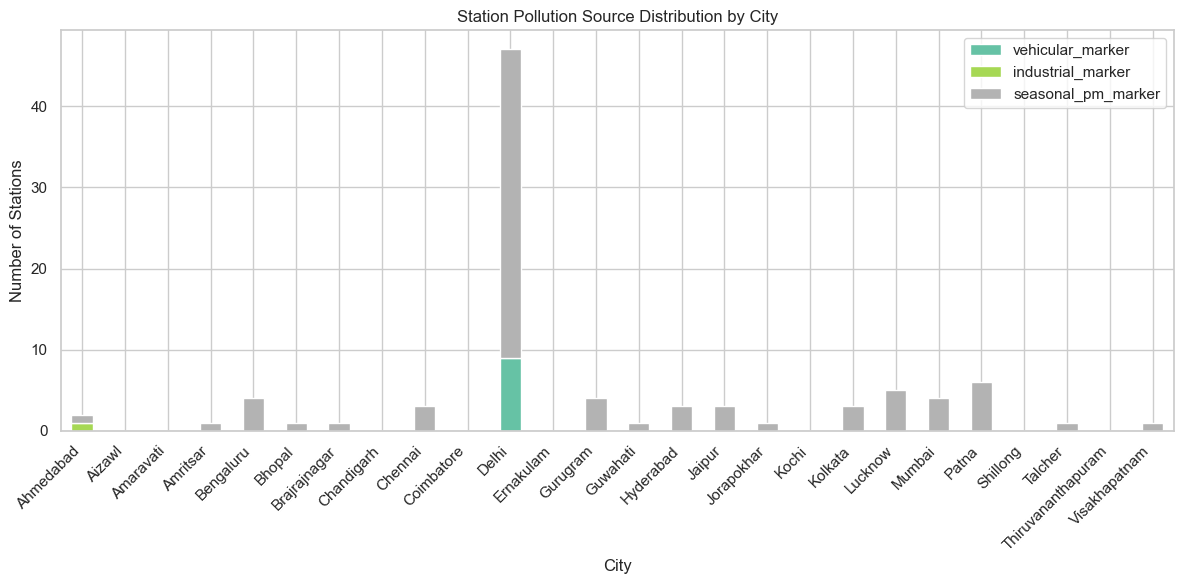

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure lowercase columns
station_day.columns = [c.strip().lower() for c in station_day.columns]
station.columns = [c.strip().lower() for c in station.columns]

# Merge station metadata (for city and station_name)
station_full = station_day.merge(station[['stationid','stationname','city']], on='stationid', how='left')

# Aggregate station-level pollutant averages
station_stats = station_full.groupby("stationid").agg(
    station_name=('stationname','first'),
    city=('city','first'),
    mean_pm25=('pm2.5','mean'),
    mean_pm10=('pm10','mean'),
    mean_no2=('no2','mean'),
    mean_so2=('so2','mean'),
    mean_co=('co','mean'),
    mean_o3=('o3','mean')
).reset_index()

# Assign source markers
station_stats['vehicular_marker'] = ((station_stats['mean_no2'] > 50) & (station_stats['mean_co'] > 1.0)).astype(int)
station_stats['industrial_marker'] = ((station_stats['mean_so2'] > 20) & (station_stats['mean_no2'] > 40)).astype(int)
station_stats['seasonal_pm_marker'] = ((station_stats['mean_pm25'] > 60) | (station_stats['mean_pm10'] > 100)).astype(int)

# Display sample stations
print(station_stats[['station_name','city','vehicular_marker','industrial_marker','seasonal_pm_marker']].head(15))
# Prepare stacked data
source_counts = station_stats.groupby('city')[['vehicular_marker','industrial_marker','seasonal_pm_marker']].sum()
source_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title("Station Pollution Source Distribution by City")
plt.ylabel("Number of Stations")
plt.xlabel("City")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3. Station Performance & Data Quality Audit
### Assess coverage gaps, missing data patterns,non-operational periods, and reliability of various stations.Recommend strategies to improve India’s air monitoring network.

Stations with low operational coverage (<80%):
    stationid  days_reported  total_days  coverage_pct
0       AP001            951        2009     47.336984
1       AP005           1462        2009     72.772524
2       AS001            502        2009     24.987556
3       BR005            126        2009      6.271777
4       BR006            121        2009      6.022897
..        ...            ...         ...           ...
105     WB009            398        2009     19.810851
106     WB010            395        2009     19.661523
107     WB011            604        2009     30.064709
108     WB012            331        2009     16.475859
109     WB013            814        2009     40.517670

[85 rows x 4 columns]


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12076\2114590067.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


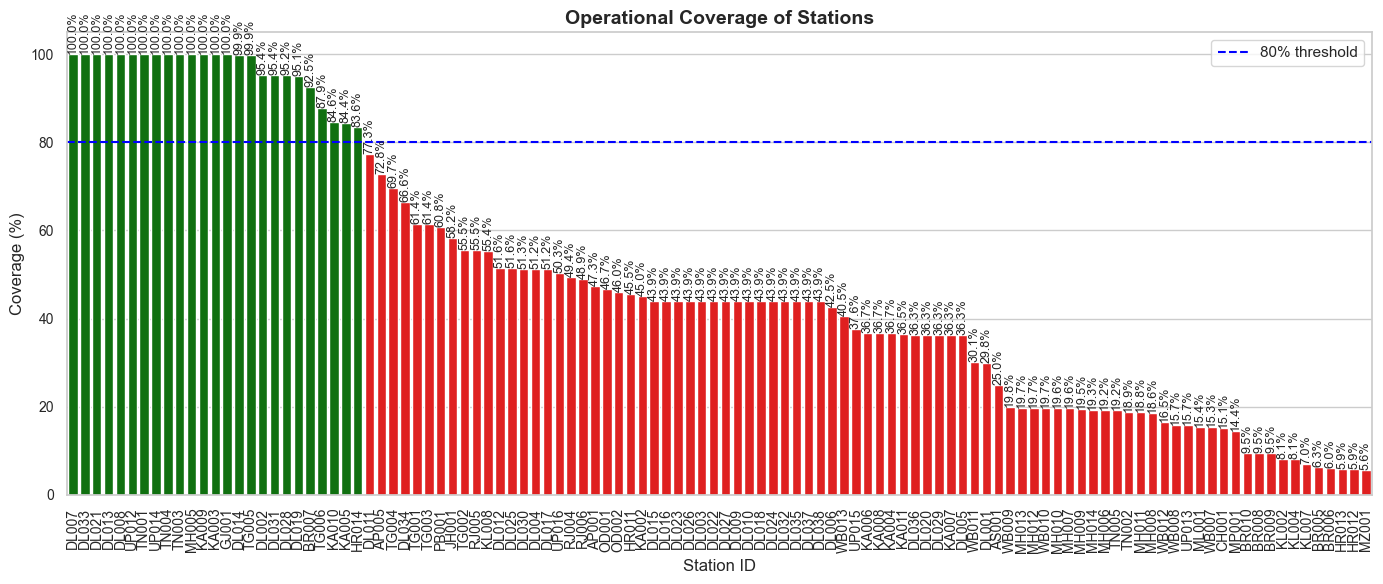

In [13]:
import pandas as pd

# Ensure lowercase columns
station_day.columns = [c.strip().lower() for c in station_day.columns]

# Convert 'date' to datetime
station_day['date'] = pd.to_datetime(station_day['date'], errors='coerce')

# Drop rows where date could not be parsed
station_day = station_day.dropna(subset=['date'])

# Count of days reported per station
station_days_reported = station_day.groupby("stationid")["date"].nunique().reset_index()
station_days_reported.rename(columns={"date":"days_reported"}, inplace=True)

# Calculate total possible days in dataset
min_date = station_day['date'].min()
max_date = station_day['date'].max()
total_days = (max_date - min_date).days + 1
station_days_reported['total_days'] = total_days

# Compute coverage %
station_days_reported['coverage_pct'] = (station_days_reported['days_reported'] / station_days_reported['total_days']) * 100

# Filter stations with <80% coverage
low_coverage = station_days_reported[station_days_reported['coverage_pct'] < 80]

print("Stations with low operational coverage (<80%):")
print(low_coverage)
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by coverage
station_days_reported_sorted = station_days_reported.sort_values("coverage_pct", ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

# Sort stations by coverage
station_days_reported_sorted = station_days_reported.sort_values("coverage_pct", ascending=False)

plt.figure(figsize=(14,6))
# Color: red if <80%, else green
colors = ['red' if x < 80 else 'green' for x in station_days_reported_sorted['coverage_pct']]

bars = sns.barplot(
    x=station_days_reported_sorted['stationid'],
    y=station_days_reported_sorted['coverage_pct'],
    palette=colors
)

# Add coverage percentage labels on top of bars
for bar, pct in zip(bars.patches, station_days_reported_sorted['coverage_pct']):
    bars.annotate(f"{pct:.1f}%", 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=9, rotation=90)

plt.axhline(80, color='blue', linestyle='--', label='80% threshold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel("Coverage (%)", fontsize=12)
plt.xlabel("Station ID", fontsize=12)
plt.title("Operational Coverage of Stations", fontsize=14, weight='bold')
plt.legend()
plt.tight_layout()
plt.show()



In [14]:
# Reliability = coverage %
station_quality = station_days_reported.copy()
station_quality['reliability_score'] = station_quality['coverage_pct']

# Sort by reliability
top_reliable_stations = station_quality.sort_values("reliability_score", ascending=False).head(10)
print(top_reliable_stations[['stationid', 'days_reported', 'coverage_pct', 'reliability_score']])

    stationid  days_reported  coverage_pct  reliability_score
16      DL007           2009         100.0              100.0
42      DL033           2009         100.0              100.0
30      DL021           2009         100.0              100.0
22      DL013           2009         100.0              100.0
17      DL008           2009         100.0              100.0
98      UP012           2009         100.0              100.0
93      TN001           2009         100.0              100.0
100     UP014           2009         100.0              100.0
96      TN004           2009         100.0              100.0
95      TN003           2009         100.0              100.0


In [15]:
import pandas as pd

# Merge station names
station_info = station[['stationid','stationname']] if 'stationname' in station.columns else station[['stationid']]
station_quality_named = station_quality.merge(station_info, on='stationid', how='left')
station_days_named = station_days_reported.merge(station_info, on='stationid', how='left')

# Prepare recommendation list
recs = []

# 1. Low reliability stations
low_rel = station_quality_named[station_quality_named['reliability_score'] < 50]
if not low_rel.empty:
    recs.append({
        "Category": "Station Reliability",
        "Stations": ", ".join(low_rel['stationname'].tolist()),
        "Recommendation": "Repair or upgrade these stations."
    })

# 2. Missing data handling
recs.append({
    "Category": "Data Gaps",
    "Stations": "-",
    "Recommendation": "Implement automated imputation for minor gaps (<5%) and backup sensors for larger gaps (>5%)."
})

# 3. Low coverage stations
low_cov = station_days_named[station_days_named['coverage_pct'] < 80]
if not low_cov.empty:
    recs.append({
        "Category": "Station Coverage",
        "Stations": ", ".join(low_cov['stationname'].tolist()),
        "Recommendation": "Increase monitoring density in these areas."
    })

# 4. Regular maintenance
recs.append({
    "Category": "Maintenance",
    "Stations": "-",
    "Recommendation": "Schedule periodic maintenance and calibration for all stations."
})

# Convert to dataframe
rec_df = pd.DataFrame(recs)

# Style table for better visualization
styled_table = rec_df.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#2E86C1'), ('color', 'white'), ('font-size','14px')]},
    {'selector': 'tbody td', 'props': [('padding','6px'), ('font-size','12px')]}
]).set_properties(subset=['Recommendation'], **{'width':'400px'})

styled_table



,Category,Stations,Recommendation
0,Station Reliability,"Secretariat, Amaravati - APPCB, Railway Colony, Guwahati - APCB, DRM Office Danapur, Patna - BSPCB, Govt. High School Shikarpur, Patna - BSPCB, Muradpur, Patna - BSPCB, Rajbansi Nagar, Patna - BSPCB, Samanpura, Patna - BSPCB, Sector-25, Chandigarh - CPCC, Alipur, Delhi - DPCC, Ashok Vihar, Delhi - DPCC, Bawana, Delhi - DPCC, Burari Crossing, Delhi - IMD, Dr. Karni Singh Shooting Range, Delhi - DPCC, Dwarka-Sector 8, Delhi - DPCC, Jahangirpuri, Delhi - DPCC, Jawaharlal Nehru Stadium, Delhi - DPCC, Major Dhyan Chand National Stadium, Delhi - DPCC, Mundka, Delhi - DPCC, Najafgarh, Delhi - DPCC, Narela, Delhi - DPCC, Nehru Nagar, Delhi - DPCC, Okhla Phase-2, Delhi - DPCC, Patparganj, Delhi - DPCC, Pusa, Delhi - DPCC, Rohini, Delhi - DPCC, Sonia Vihar, Delhi - DPCC, Sri Aurobindo Marg, Delhi - DPCC, Vivek Vihar, Delhi - DPCC, Wazirpur, Delhi - DPCC, NISE Gwal Pahari, Gurugram - IMD, Sector-51, Gurugram - HSPCB, Teri Gram, Gurugram - HSPCB, BTM Layout, Bengaluru - CPCB, Bapuji Nagar, Bengaluru - KSPCB, Hebbal, Bengaluru - KSPCB, Hombegowda Nagar, Bengaluru - KSPCB, Jayanagar 5th Block, Bengaluru - KSPCB, Silk Board, Bengaluru - KSPCB, Kacheripady, Ernakulam - Kerala PCB, Vyttila, Kochi - Kerala PCB, Kariavattom, Thiruvananthapuram - Kerala PCB, Borivali East, Mumbai - MPCB, Chhatrapati Shivaji Intl. Airport (T2), Mumbai - MPCB, Colaba, Mumbai - MPCB, Kurla, Mumbai - MPCB, Powai, Mumbai - MPCB, Sion, Mumbai - MPCB, Vasai West, Mumbai - MPCB, Vile Parle West, Mumbai - MPCB, Worli, Mumbai - MPCB, Lumpyngngad, Shillong - Meghalaya PCB, T T Nagar, Bhopal - MPPCB, Sikulpuikawn, Aizawl - Mizoram PCB, GM Office, Brajrajnagar - OSPCB, Talcher Coalfields,Talcher - OSPCB, Adarsh Nagar, Jaipur - RSPCB, Shastri Nagar, Jaipur - RSPCB, Manali Village, Chennai - TNPCB, SIDCO Kurichi, Coimbatore - TNPCB, Gomti Nagar, Lucknow - UPPCB, Nishant Ganj, Lucknow - UPPCB, Ballygunge, Kolkata - WBPCB, Bidhannagar, Kolkata - WBPCB, Fort William, Kolkata - WBPCB, Jadavpur, Kolkata - WBPCB, Rabindra Bharati University, Kolkata - WBPCB, Rabindra Sarobar, Kolkata - WBPCB, Victoria, Kolkata - WBPCB",Repair or upgrade these stations.
1,Data Gaps,-,Implement automated imputation for minor gaps (<5%) and backup sensors for larger gaps (>5%).
2,Station Coverage,"Secretariat, Amaravati - APPCB, GVM Corporation, Visakhapatnam - APPCB, Railway Colony, Guwahati - APCB, DRM Office Danapur, Patna - BSPCB, Govt. High School Shikarpur, Patna - BSPCB, Muradpur, Patna - BSPCB, Rajbansi Nagar, Patna - BSPCB, Samanpura, Patna - BSPCB, Sector-25, Chandigarh - CPCC, Alipur, Delhi - DPCC, Ashok Vihar, Delhi - DPCC, Aya Nagar, Delhi - IMD, Bawana, Delhi - DPCC, Burari Crossing, Delhi - IMD, Dr. Karni Singh Shooting Range, Delhi - DPCC, Dwarka-Sector 8, Delhi - DPCC, East Arjun Nagar, Delhi - CPCB, IGI Airport (T3), Delhi - IMD, Jahangirpuri, Delhi - DPCC, Jawaharlal Nehru Stadium, Delhi - DPCC, Lodhi Road, Delhi - IMD, Major Dhyan Chand National Stadium, Delhi - DPCC, Mundka, Delhi - DPCC, Najafgarh, Delhi - DPCC, Narela, Delhi - DPCC, Nehru Nagar, Delhi - DPCC, North Campus, DU, Delhi - IMD, Okhla Phase-2, Delhi - DPCC, Patparganj, Delhi - DPCC, Pusa, Delhi - DPCC, Pusa, Delhi - IMD, Rohini, Delhi - DPCC, Sirifort, Delhi - CPCB, Sonia Vihar, Delhi - DPCC, Sri Aurobindo Marg, Delhi - DPCC, Vivek Vihar, Delhi - DPCC, Wazirpur, Delhi - DPCC, NISE Gwal Pahari, Gurugram - IMD, Sector-51, Gurugram - HSPCB, Teri Gram, Gurugram - HSPCB, Tata Stadium, Jorapokhar - JSPCB, BTM Layout, Bengaluru - CPCB, Bapuji Nagar, Bengaluru - KSPCB, Hebbal, Bengaluru - KSPCB, Hombegowda Nagar, Bengaluru - KSPCB, Jayanagar 5th Block, Bengaluru - KSPCB, Silk Board, Bengaluru - KSPCB, Kacheripady, Ernakulam - Kerala PCB, Vyttila, Kochi - Kerala PCB, Kariavattom, Thiruvananthapuram - Kerala PCB, Plammoodu, Thiruvananthapuram - Kerala PCB, Borivali East, Mumbai - MPCB, Chhatrapati Shivaji Intl. Airport (T2), Mumbai - MPCB, Colaba, Mumbai - MPCB, Kurla, Mumb

### The data gaps have already been handled above using Either Imputation or Removal

## 4. Impact Metrics & Public Health Analysis
### Create risk scores for cities based on exposure duration and pollutant intensity. Estimate which populations are most vulnerable. Identify cities with the largest year-on-year deterioration or improvement.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

# Standardize column names: lowercase & replace spaces / dots
city_day.columns = [c.strip().lower().replace(" ","_").replace(".","_") for c in city_day.columns]

# Ensure 'date' is datetime
city_day['date'] = pd.to_datetime(city_day['date'], errors='coerce')

# Add year column
city_day['year'] = city_day['date'].dt.year

# Select pollutants (make sure names match lowercase columns)
pollutants = ["pm2_5","pm10","no2","so2","co","o3"]
pollutants = [p for p in pollutants if p in city_day.columns]  # keep only existing columns

# Quick check
print(city_day.head())

        city       date  pm2_5   pm10     no    no2    nox    nh3     co  \
0  Ahmedabad 2015-01-01  48.57  95.68   0.92  18.22  17.15  15.85   0.92   
1  Ahmedabad 2015-01-02  48.57  95.68   0.97  15.69  16.46  15.85   0.97   
2  Ahmedabad 2015-01-03  48.57  95.68  17.40  19.30  29.70  15.85  17.40   
3  Ahmedabad 2015-01-04  48.57  95.68   1.70  18.48  17.97  15.85   1.70   
4  Ahmedabad 2015-01-05  48.57  95.68  22.10  21.42  37.76  15.85  22.10   

     so2      o3  benzene  toluene  xylene    aqi aqi_bucket  month  year  
0  27.64  133.36     0.00     0.02    0.00  118.0   Moderate      1  2015  
1  24.55   34.06     3.68     5.50    3.77  118.0   Moderate      1  2015  
2  29.07   30.70     6.80    16.40    2.25  118.0   Moderate      1  2015  
3  18.59   36.08     4.43    10.14    1.00  118.0   Moderate      1  2015  
4  39.33   39.31     7.01    18.89    2.78  118.0   Moderate      1  2015  


In [17]:
import pandas as pd
import numpy as np

# Ensure column names are lowercase and consistent
city_day.columns = [c.strip().lower().replace(" ","_").replace(".","_") for c in city_day.columns]

# Ensure 'aqi' exists and is numeric
city_day['aqi'] = pd.to_numeric(city_day['aqi'], errors='coerce')

# Define AQI threshold for "unhealthy" days
aqi_threshold = 100

# Exposure duration: number of days AQI > threshold
city_exposure = city_day.groupby('city').agg(
    days_above_threshold=('aqi', lambda x: (x>aqi_threshold).sum()),
    avg_aqi=('aqi','mean')
).reset_index()

# Average pollutant intensities
pollutants = ["pm2_5","pm10","no2","so2","co","o3"]
pollutants = [p for p in pollutants if p in city_day.columns]  # ensure existing

city_pollutant_avg = city_day.groupby('city')[pollutants].mean().reset_index()

# Merge exposure & pollutant averages
city_metrics = city_exposure.merge(city_pollutant_avg, on='city')

# Display
print(city_metrics.head())

        city  days_above_threshold     avg_aqi      pm2_5        pm10  \
0  Ahmedabad                  1965  339.861623  61.826292   99.509736   
1     Aizawl                     2   36.238938  17.686460   23.992920   
2  Amaravati                   384   97.925342  38.443049   77.479253   
3   Amritsar                   664  119.771499  54.745168  114.195291   
4  Bengaluru                   770   95.485316  36.746421   85.471867   

         no2        so2         co         o3  
0  47.726351  40.569816  15.735580  36.320139  
1   0.388496   7.378053   0.283628   5.868673  
2  22.147655  13.909874   0.654637  37.694353  
3  18.636274   8.288034   0.572383  23.209550  
4  27.976212   5.529895   1.833440  32.722718  


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

from sklearn.metrics import mean_squared_error
import numpy as np

features = [p for p in pollutants if p in city_metrics.columns] + ['days_above_threshold']
X = city_metrics[features]
y = city_metrics['avg_aqi']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'LinearRegression': LinearRegression(),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1, verbosity=0)
}

# Predictions storage
risk_predictions = pd.DataFrame({'city': city_metrics['city']})
# Show risk score
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X)
    risk_predictions[name+'_risk_score'] = pred
    
    # Compute RMSE manually
    rmse = np.sqrt(mean_squared_error(y, pred))
    print(f"{name} RMSE: {rmse:.2f}")

RandomForest RMSE: 37.24
LinearRegression RMSE: 7.01
XGBoost RMSE: 42.38


In [19]:
import pandas as pd
import numpy as np

# Synthetic population dataset (example)
city_population = pd.DataFrame({
    'city': city_metrics['city'],
    'population': np.random.randint(500_000, 20_000_000, size=len(city_metrics))
})

# Merge with risk scores (RandomForest used here)
vulnerable = risk_predictions[['city','RandomForest_risk_score']].merge(city_population, on='city')

# Compute population-weighted risk
vulnerable['population_risk'] = vulnerable['RandomForest_risk_score'] * vulnerable['population']

# Top 10 vulnerable cities
top_vulnerable = vulnerable.sort_values('population_risk', ascending=False).head(10).reset_index(drop=True)

# Optional: round values for readability
top_vulnerable['population_risk'] = top_vulnerable['population_risk'].round(0)
top_vulnerable['RandomForest_risk_score'] = top_vulnerable['RandomForest_risk_score'].round(2)

top_vulnerable

,city,RandomForest_risk_score,population,population_risk
0,Lucknow,210.30,18240427,3.835939e+09
1,Delhi,240.00,11023236,2.645631e+09
2,Patna,209.16,12529748,2.620680e+09
3,Guwahati,140.27,18168144,2.548421e+09
4,Talcher,152.91,16282483,2.489798e+09
5,Mumbai,127.50,18172767,2.317016e+09
6,Gurugram,201.65,11467331,2.312389e+09
7,Kolkata,138.60,16561719,2.295405e+09
8,Bengaluru,98.80,19546573,1.931165e+09
9,Chennai,113.65,16187534,1.839633e+09


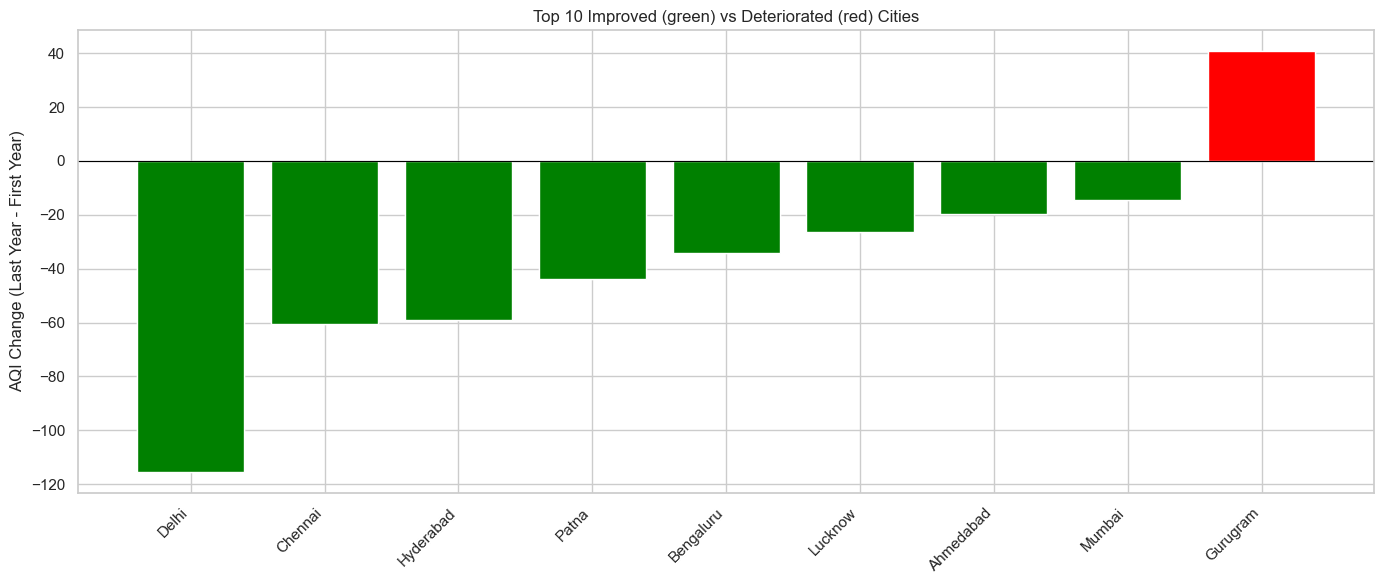

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14,6)

# Ensure 'date' is datetime
city_day['date'] = pd.to_datetime(city_day['date'])
city_day['year'] = city_day['date'].dt.year

# Compute annual average AQI per city
city_yearly = city_day.groupby(['city','year'])['aqi'].mean().reset_index()

# Pivot for YoY comparison
city_yearly_pivot = city_yearly.pivot(index='city', columns='year', values='aqi')
city_yearly_pivot['yoy_change'] = city_yearly_pivot.iloc[:,-1] - city_yearly_pivot.iloc[:,0]

# Combine top improved and deteriorated
top_cities = pd.concat([
    city_yearly_pivot.nsmallest(10, 'yoy_change'),  # improved (negative)
    city_yearly_pivot.nlargest(10, 'yoy_change')    # deteriorated (positive)
])

# Diverging bar chart
top_cities_sorted = top_cities.sort_values('yoy_change')
colors = ['green' if x < 0 else 'red' for x in top_cities_sorted['yoy_change']]

plt.figure(figsize=(14,6))
plt.bar(top_cities_sorted.index, top_cities_sorted['yoy_change'], color=colors)
plt.xticks(rotation=45, ha='right')
plt.ylabel("AQI Change (Last Year - First Year)")
plt.title("Top 10 Improved (green) vs Deteriorated (red) Cities")
plt.axhline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

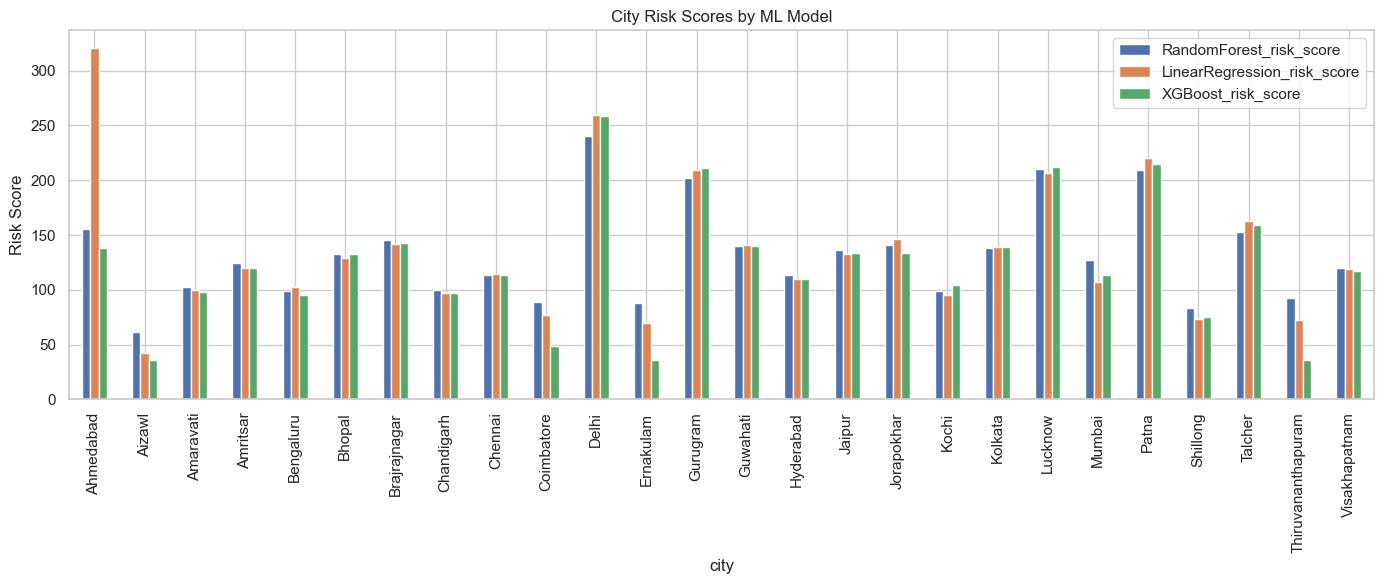

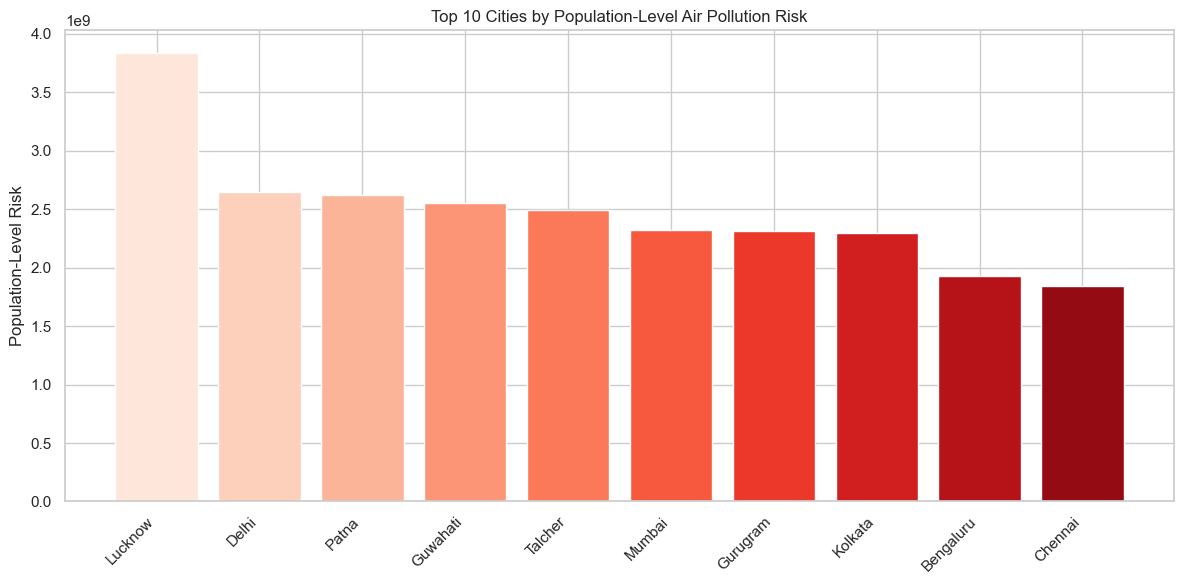

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# -------------------------------
# 1️ Risk Scores per City (all models)
# -------------------------------
plt.figure(figsize=(14,6))
risk_predictions.set_index('city')[['RandomForest_risk_score','LinearRegression_risk_score','XGBoost_risk_score']].plot(
    kind='bar',
    figsize=(14,6)
)
plt.xticks(rotation=90)
plt.ylabel("Risk Score")
plt.title("City Risk Scores by ML Model")
plt.tight_layout()
plt.show()

# -------------------------------
# 2️ Top 10 Vulnerable Cities (Population-Level Risk)
# -------------------------------
top_vulnerable = vulnerable.sort_values('population_risk', ascending=False).head(10)

plt.figure(figsize=(12,6))
colors = sns.color_palette("Reds", len(top_vulnerable))  # red shades for population risk
plt.bar(top_vulnerable['city'], top_vulnerable['population_risk'], color=colors)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Population-Level Risk")
plt.title("Top 10 Cities by Population-Level Air Pollution Risk")
plt.tight_layout()
plt.show()

In [22]:
# -----------------------------
# Save ONLY the Linear Regression model as main model
# -----------------------------
import joblib
main_model = models['LinearRegression']
joblib.dump(main_model, "model.pkl")
print("Main model (Linear Regression) saved as model.pkl")

# -----------------------------
# Save risk score dataset
# -----------------------------
risk_predictions.to_csv("city_risk_scores.csv", index=False)
print("Risk scores saved as city_risk_scores.csv")

# -----------------------------
# Save model performance metrics
# -----------------------------
metrics_df = []

for name, model in models.items():
    pred_test = model.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
    metrics_df.append([name, rmse_test])

metrics_df = pd.DataFrame(metrics_df, columns=["Model", "RMSE"])
metrics_df.to_csv("model_metrics.csv", index=False)
print("Model metrics saved as model_metrics.csv")

# -----------------------------
# Final status
# -----------------------------
print("\nAll tasks completed:")
print("1. Linear Regression model stored : model.pkl")
print("2. City risk scores stored : city_risk_scores.csv")
print("3. RMSE metrics stored : model_metrics.csv")

Main model (Linear Regression) saved as model.pkl
Risk scores saved as city_risk_scores.csv
Model metrics saved as model_metrics.csv

All tasks completed:
1. Linear Regression model stored : model.pkl
2. City risk scores stored : city_risk_scores.csv
3. RMSE metrics stored : model_metrics.csv


In [23]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(main_model, f)